# 1D He Data analysis 
Using the builtin inversion methods.\
By: Anthony R. Osborne

#### Import and Set up

In [2]:
import numpy as np 
import os.path
import scipy as sp 
import matplotlib.pyplot as plt
import Personal_research_tools.new_reader as new_reader
import inspect

ModuleNotFoundError: No module named 'Personal_research_tools'

#### Read in data for all methods

In [ ]:
x_grid, godby_dens, godby_vks, godby_vxc, godby_vh = data_reader.getData1("godby")#, "1")
x_grid, stella_dens, stella_vks, stella_vxc, stella_vh = data_reader.getData1("stella")#, "y")
x_grid, two_particle_dens, two_particle_vks, two_particle_vxc, two_particle_vh = data_reader.getData1("two_particle")#, "y")
x_grid, target_dens, target_vks, target_vxc, target_vh = data_reader.getData1("target")#, "y")

In [ ]:
## Import data for Wang-Parr
x_grid, wp_dens, wp_vks, wp_vxc, wp_vh = data_reader.getData1_1("wang_parr")#, "n")

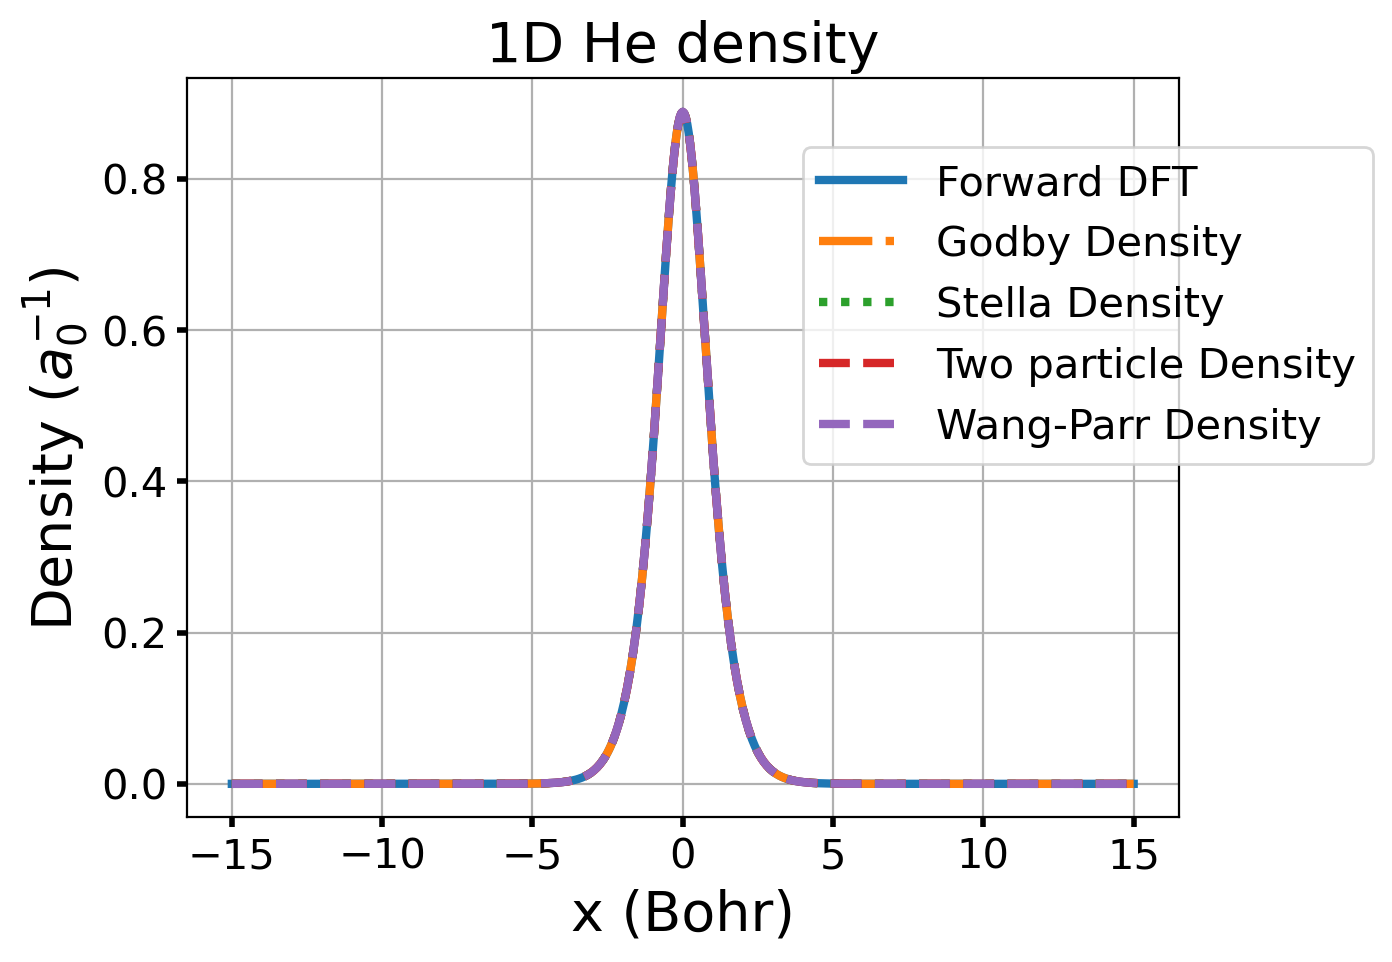

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid,  target_dens, label=r"Forward DFT", linewidth=3, ls="-")
ax.plot(x_grid,  godby_dens, label=r"Godby Density", linewidth=3, ls="-.")
ax.plot(x_grid,  stella_dens, label=r"Stella Density", linewidth=3, ls=":")
ax.plot(x_grid,  two_particle_dens, label=r"Two particle Density", linewidth=3, ls="--")
ax.plot(x_grid,  wp_dens, label=r"Wang-Parr Density", linewidth=3, ls="--")
#---------------> Formatting
ax.set_title(r"1D He density", fontsize = 20)
ax.set_ylabel(r"Density ($a_0^{-1}$)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor=(0.6, .45), fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.show()

# Need to finish the cell below this one

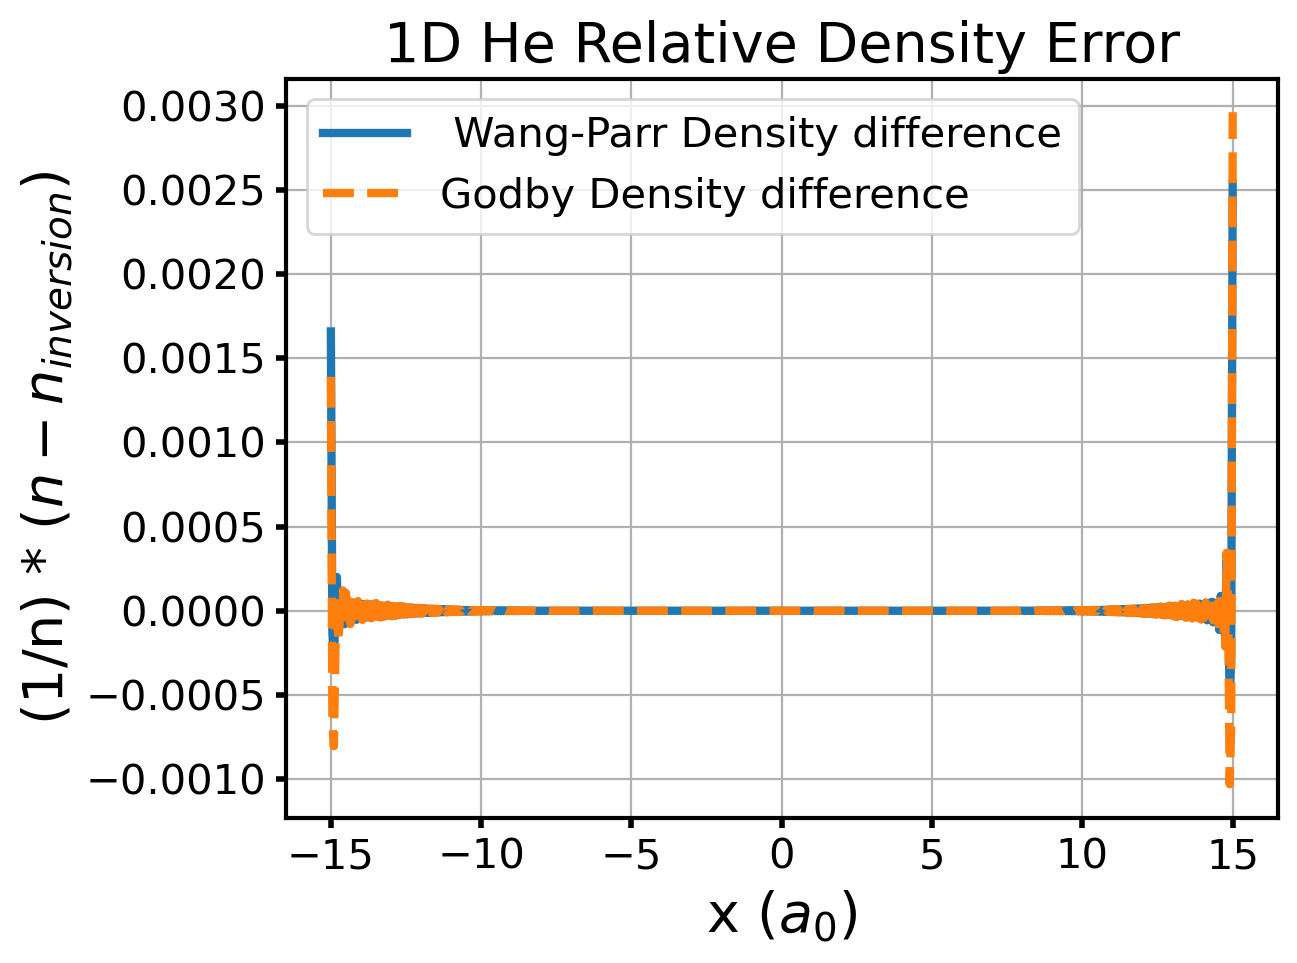

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid, (1/target_dens) * (target_dens-wp_dens), linewidth=3, label=" Wang-Parr Density difference")
ax.plot(x_grid, (1/target_dens) * (target_dens-godby_dens), linewidth=3, label="Godby Density difference", ls='--')
# ax.plot(x_grid, (1/target_dens) * (target_dens-stella_dens), linewidth=3, label="Stella Density difference",ls='-.')
# ax.plot(x_grid, (1/target_dens) * (target_dens-two_particle_dens), linewidth=3, label="2 Particle Density difference", ls=':')
#---------------> Formatting
ax.set_title(r"1D He Relative Density Error", fontsize = 20)
ax.set_ylabel(r"(1/n) * ($n-n_{inversion}$)", fontsize = 20)
ax.set_xlabel(r"x ($a_0$)", fontsize = 20)
ax.grid(True)
ax.legend(fontsize=15)
# ax.set_ylim(-0.0005, 0.0025)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
#-------> Borders ## Have to run cell twice for this to work no idea why -- AO
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.0
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#### Check Wang-Parr density
np.trapz(wp_dens, x_grid)

2.0000000000000044

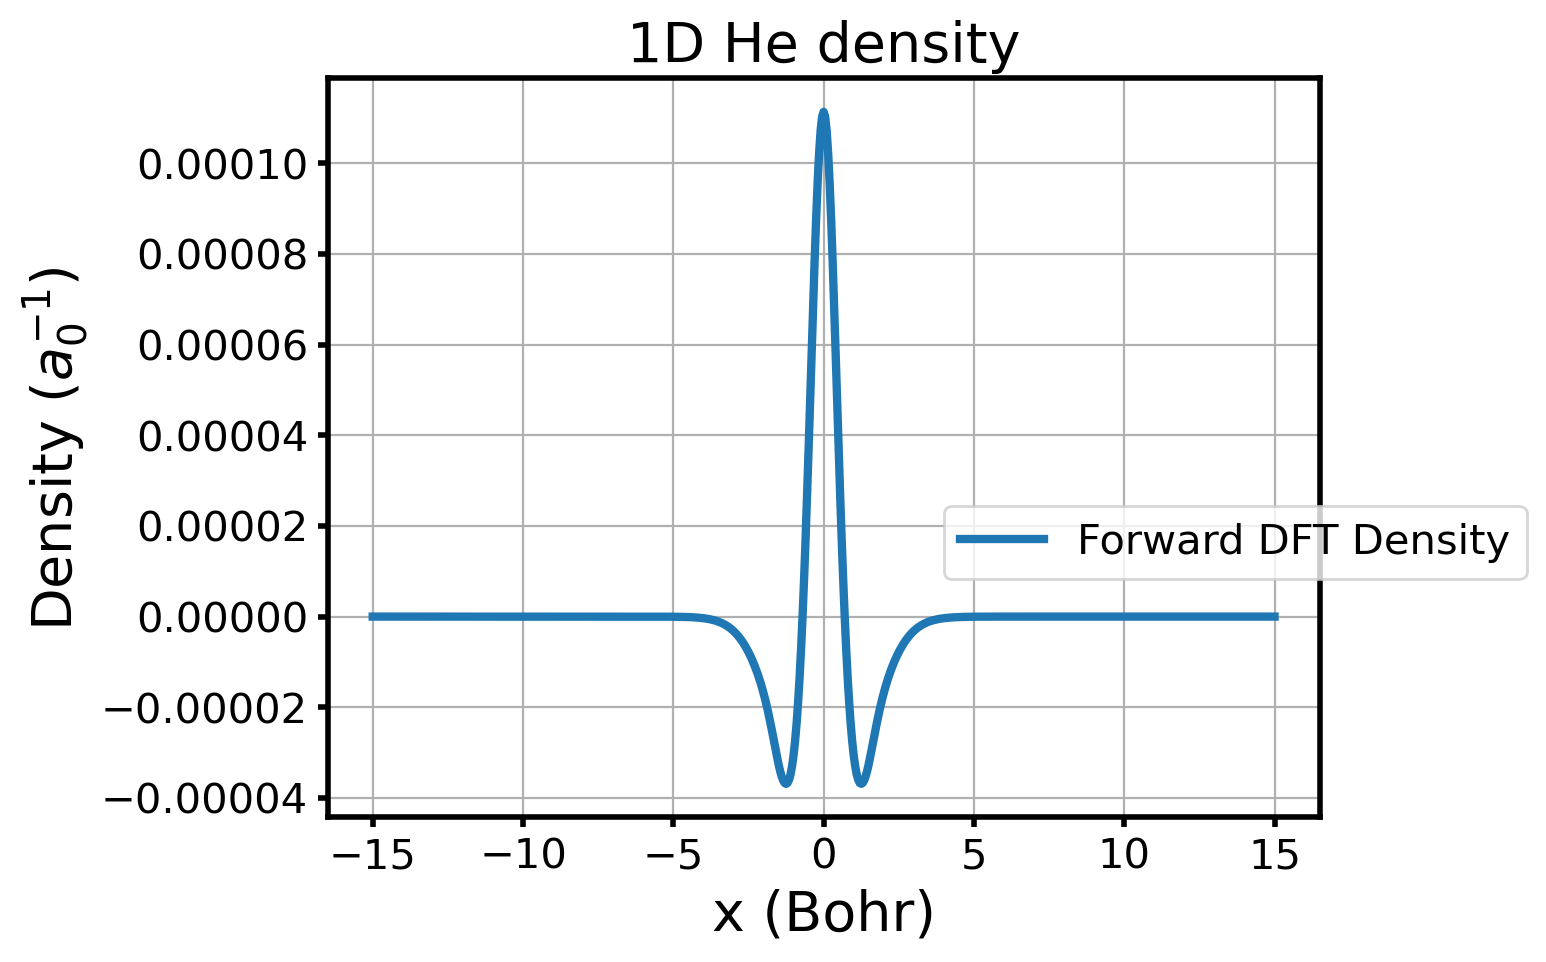

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid,  target_dens-two_particle_dens, label=r"Forward DFT Density", linewidth=3, ls="-")
# ax.plot(x_grid,  godby_dens_H2, label=r"Godby Density", linewidth=3, ls="-.")
# ax.plot(x_grid,  stella_dens_H2, label=r"Stella Density", linewidth=3, ls=":")
# ax.plot(x_grid,  two_particle_dens_H2, label=r"Two particle Density", linewidth=3, ls="--")
#---------------> Formatting
ax.set_title(r"1D He density", fontsize = 20)
ax.set_ylabel(r"Density ($a_0^{-1}$)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
# ax.set_xlim(-2,2)
ax.grid(True)
ax.legend(bbox_to_anchor=(0.6, .45), fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.show()

In [ ]:
godbyAverageDifference = np.mean(two_particle_vks - godby_vks)
print(f"Average difference Godby and two particle : ",godbyAverageDifference) 
godby_vks_corrected = godby_vks + godbyAverageDifference
godby_vxc_corrected = godby_vxc + godbyAverageDifference
stellaAverageDifference = np.mean(two_particle_vks - stella_vks)
stella_vks_corrected = stella_vks + stellaAverageDifference
stella_vxc_corrected = stella_vxc + stellaAverageDifference
wpAverageDifference = np.mean(two_particle_vks - wp_vks)
wp_vks_corrected = wp_vks + wpAverageDifference
wp_vxc_corrected = wp_vxc + wpAverageDifference

Average difference Godby and two particle :  -0.42047584077543


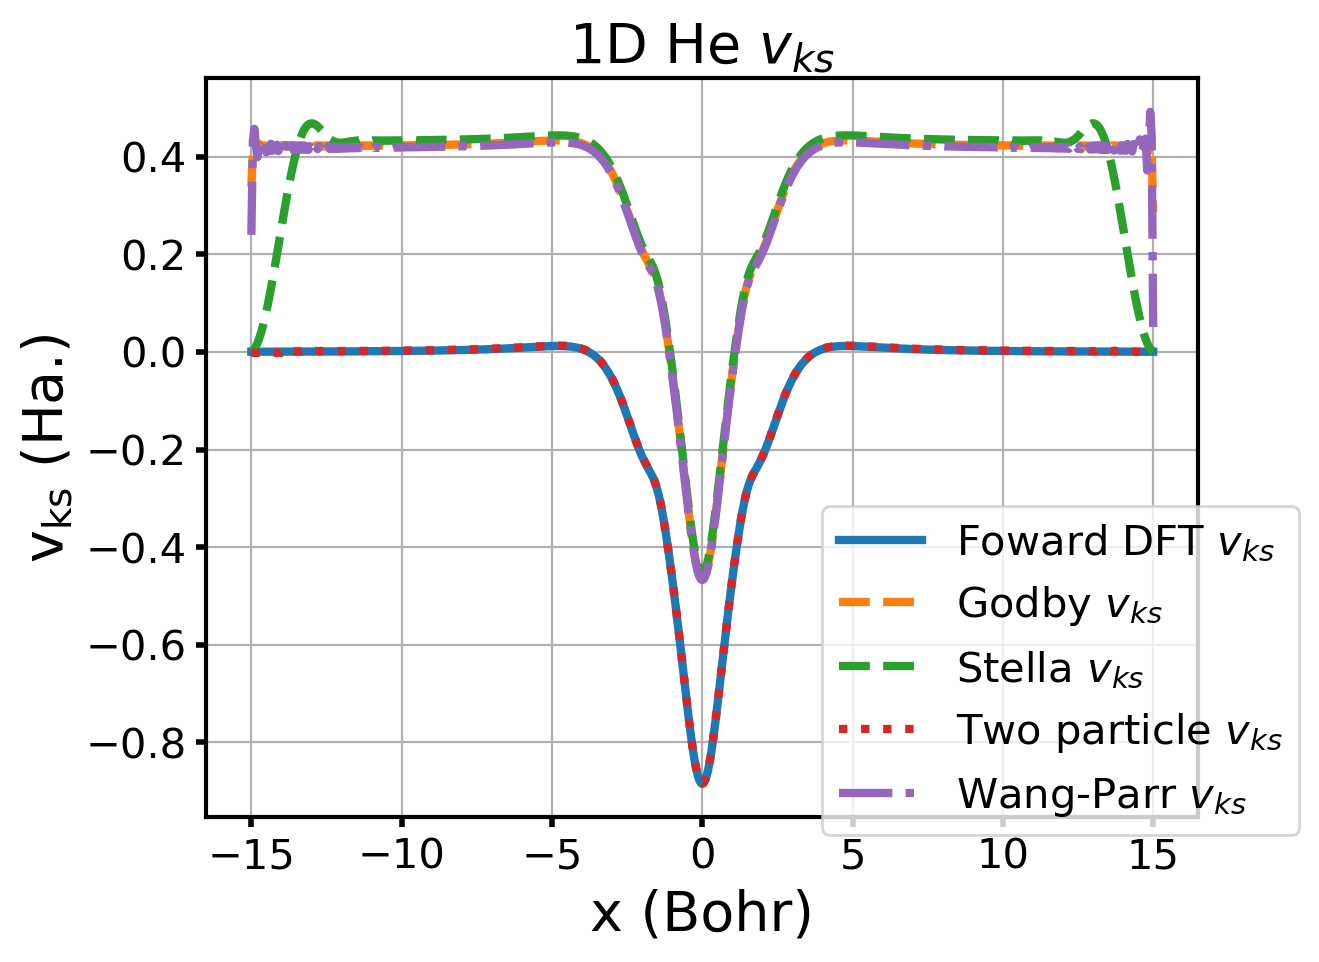

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid,  target_vks, label=r"Foward DFT $v_{ks}$", linewidth=3)
ax.plot(x_grid,  godby_vks, label=r"Godby $v_{ks}$", linewidth=3, ls="--")
ax.plot(x_grid,  stella_vks, label=r"Stella $v_{ks}$", linewidth=3, ls="--")
ax.plot(x_grid,  two_particle_vks, label=r"Two particle $v_{ks}$", linewidth=3, ls=":")
ax.plot(x_grid,  wp_vks, label=r"Wang-Parr $v_{ks}$", linewidth=3, ls="-.")
#---------------> Formatting
ax.set_title(r"1D He $v_{ks}$", fontsize = 20)
ax.set_ylabel(r"$\rm v_{ks}$ (Ha.)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
ax.legend(bbox_to_anchor=(0.6, .45), fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.show()

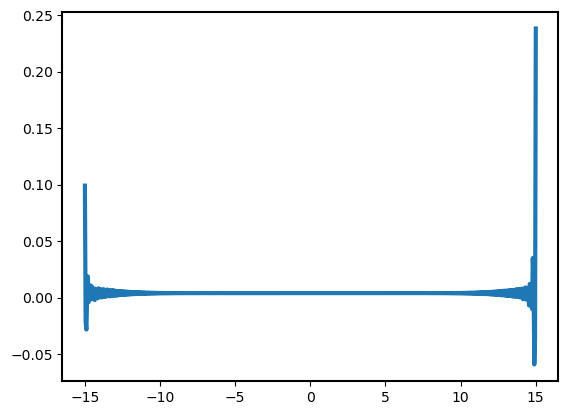

In [ ]:
plt.plot(x_grid,  godby_vks - wp_vks, label=r"Foward DFT $v_{ks}$", linewidth=3)
plt.show()

### Difference plot for non corrected $v_{ks}$

In [ ]:
# #---------------> Plot
# fig, ax = plt.subplots(1, 1, dpi=200)
# #---------------> Data
# # ax.plot(x_grid,  target_vks-two_particle_vks, label=r"Foward DFT $v_{ks}$", linewidth=3)
# ax.plot(x_grid,  two_particle_vks - godby_vks, label=r"Two particle - Godby $v_{ks}$ ", linewidth=3, ls="-")
# ax.plot(x_grid,  two_particle_vks - stella_vks, label=r"Two particle - Stella $v_{ks}$", linewidth=3, ls="-")
# # ax.plot(x_grid,  two_particle_vks, label=r"Two particle $v_{ks}$", linewidth=3, ls=":")
# #---------------> Formatting
# ax.set_title(r"1D He $v_{ks}$ Difference", fontsize = 20)
# ax.set_ylabel(r"$\rm v_{ks}$ (Ha.)", fontsize = 20)
# ax.set_xlabel(r"x (Bohr)", fontsize = 20)
# ax.grid(True)
# ax.legend( bbox_to_anchor=(0.6, .45), fontsize=15)
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 1.5
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)
# plt.show()

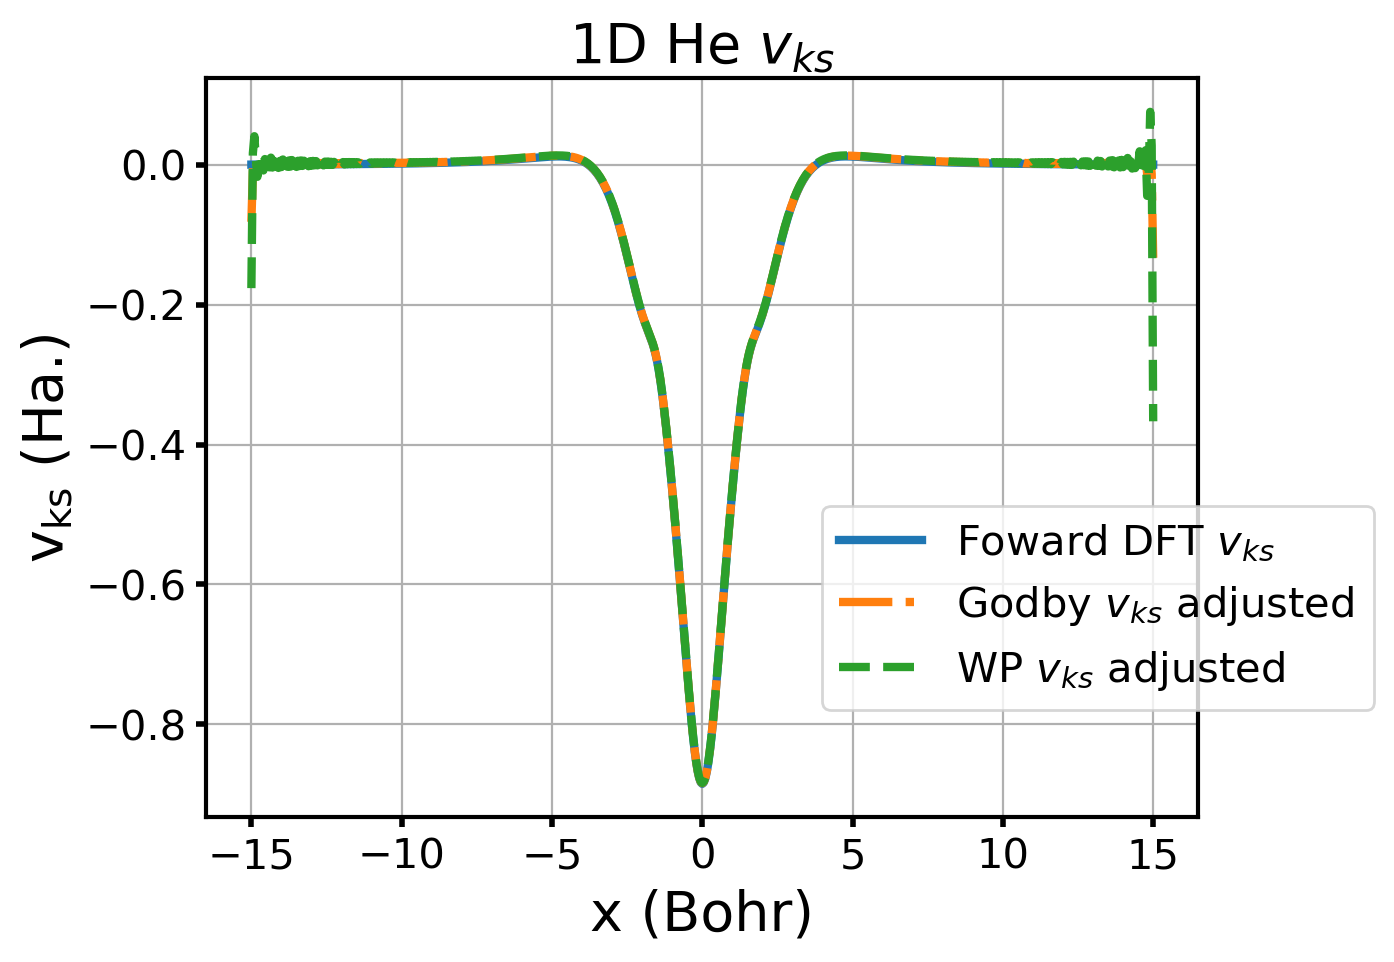

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid,  target_vks, label=r"Foward DFT $v_{ks}$", linewidth=3)
ax.plot(x_grid,  godby_vks_corrected, label=r"Godby $v_{ks}$ adjusted ", linewidth=3, ls="-.")
ax.plot(x_grid,  wp_vks_corrected, label=r"WP $v_{ks}$ adjusted ", linewidth=3, ls="--")
# ax.plot(x_grid,  stella_vks_corrected, label=r"Stella $v_{ks}$ adjusted", linewidth=3, ls="--")
# ax.plot(x_grid,  two_particle_vks, label=r"Two particle $v_{ks}$", linewidth=3, ls=":")
#---------------> Formatting
ax.set_title(r"1D He $v_{ks}$", fontsize = 20)
ax.set_ylabel(r"$\rm v_{ks}$ (Ha.)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
# ax.set_xlim(-5,5)
ax.legend(bbox_to_anchor=(0.6, .45), fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.show()

### Difference Plot to compare "corrected" vks 

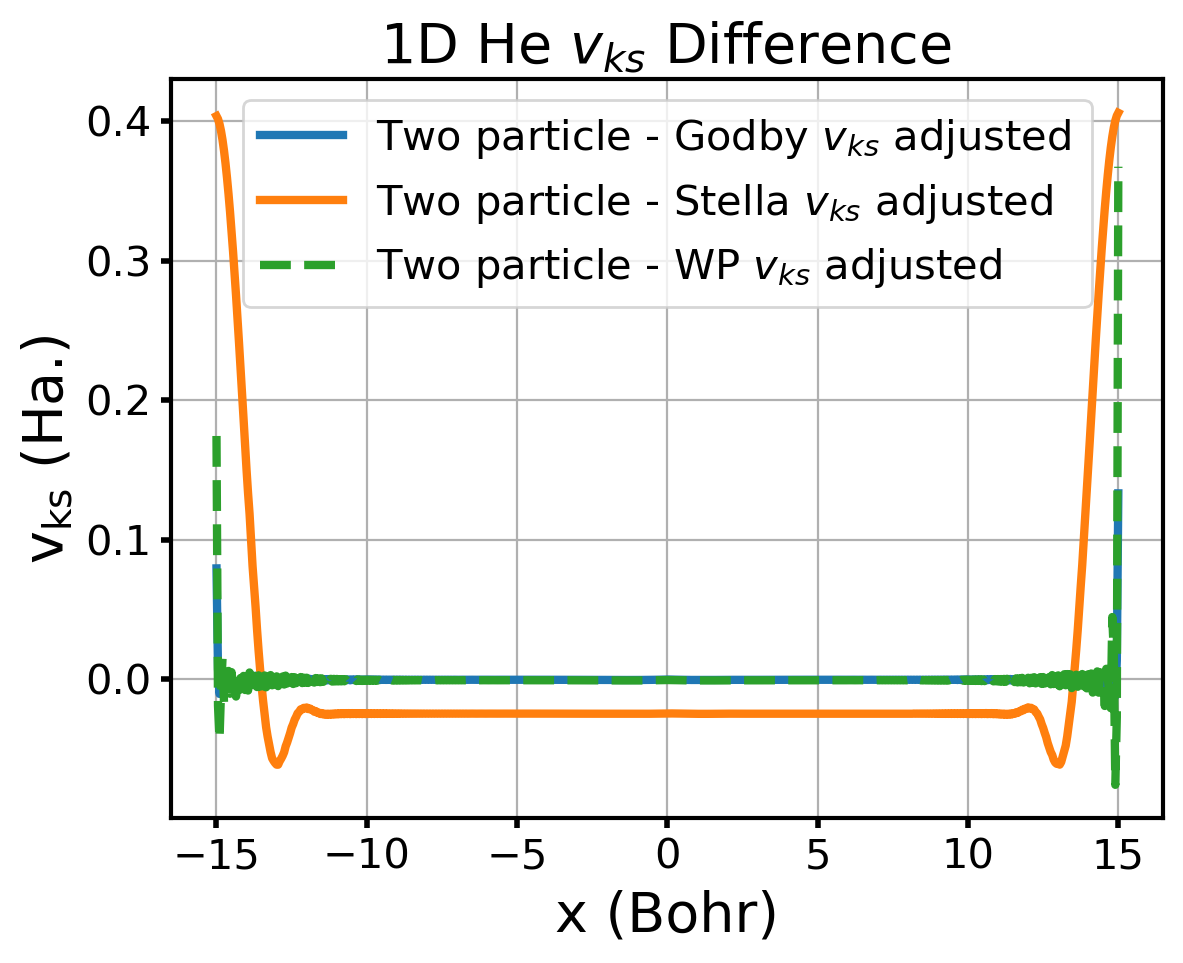

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
# ax.plot(x_grid,  two_particle_vks-target_vks, label=r"Foward DFT $v_{ks}$", linewidth=3)
ax.plot(x_grid,  two_particle_vks - godby_vks_corrected, label=r"Two particle - Godby $v_{ks}$ adjusted ", linewidth=3, ls="-")
ax.plot(x_grid,  two_particle_vks - stella_vks_corrected, label=r"Two particle - Stella $v_{ks}$ adjusted", linewidth=3, ls="-")
ax.plot(x_grid,  two_particle_vks - wp_vks_corrected, label=r"Two particle - WP $v_{ks}$ adjusted", linewidth=3, ls="--")
# ax.plot(x_grid,  two_particle_vks, label=r"Two particle $v_{ks}$", linewidth=3, ls=":")
#---------------> Formatting
ax.set_title(r"1D He $v_{ks}$ Difference ", fontsize = 20)
ax.set_ylabel(r"$\rm v_{ks}$ (Ha.)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
ax.legend(fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.show()

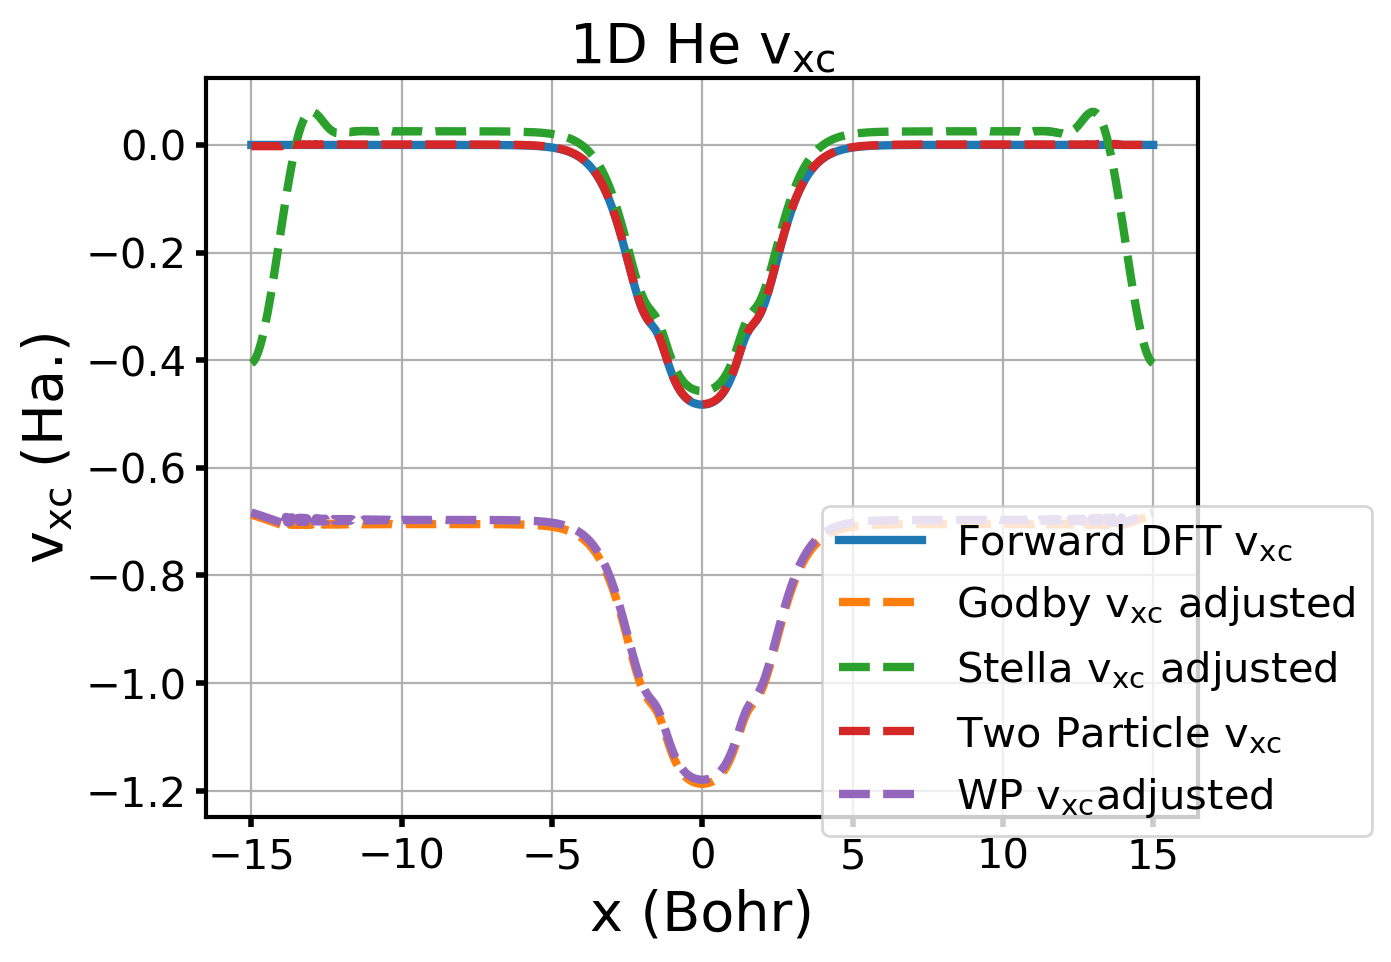

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data

ax.plot(x_grid,  target_vxc, label=r"Forward DFT $\rm v_{xc}$", linewidth=3)
ax.plot(x_grid,  godby_vxc+godbyAverageDifference, label=r"Godby $\rm v_{xc}$ adjusted", linewidth=3, ls="--")
ax.plot(x_grid,  stella_vxc+stellaAverageDifference, label=r"Stella $\rm v_{xc}$ adjusted", linewidth=3, ls="--")
ax.plot(x_grid,  two_particle_vxc, label=r"Two Particle $\rm v_{xc}$", linewidth=3, ls="--")
ax.plot(x_grid,  wp_vxc_corrected, label=r"WP $\rm v_{xc} adjusted $", linewidth=3, ls="--")
#---------------> Formatting
ax.set_title(r"1D He $\rm v_{xc}$", fontsize = 20)
ax.set_ylabel(r"$\rm \rm v_{xc}$ (Ha.)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
ax.legend( bbox_to_anchor=(0.6, .45), fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.show()

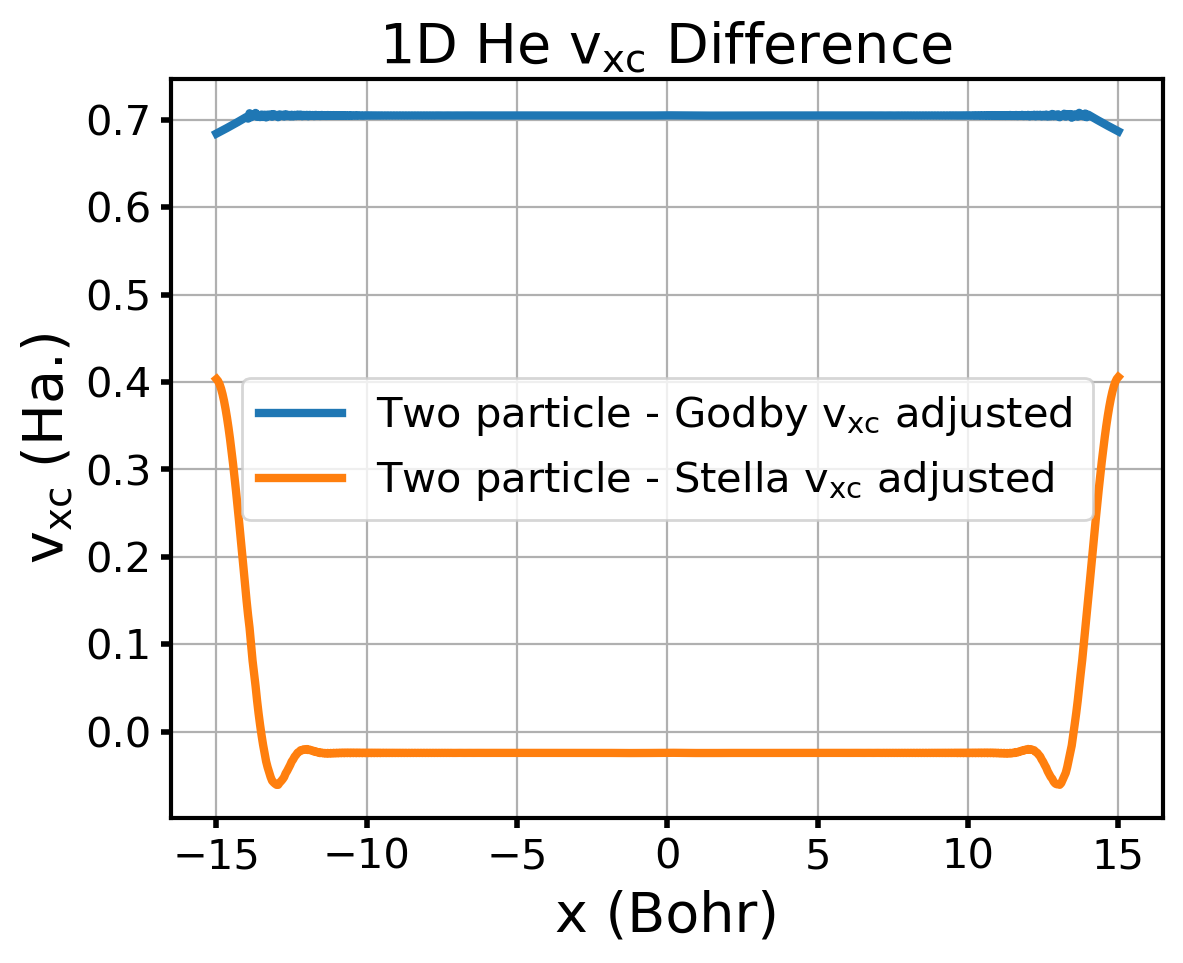

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
# ax.plot(x_grid,  two_particle_vks-target_vks, label=r"Foward DFT $v_{ks}$", linewidth=3)
ax.plot(x_grid,  two_particle_vxc - godby_vxc_corrected, label=r"Two particle - Godby $\rm v_{xc}$ adjusted ", linewidth=3, ls="-")
ax.plot(x_grid,  two_particle_vxc - stella_vxc_corrected, label=r"Two particle - Stella $\rm v_{xc}$ adjusted", linewidth=3, ls="-")
# ax.plot(x_grid,  two_particle_vks, label=r"Two particle $v_{ks}$", linewidth=3, ls=":")
#---------------> Formatting
ax.set_title(r"1D He $\rm v_{xc}$ Difference ", fontsize = 20)
ax.set_ylabel(r"$\rm \rm v_{xc}$ (Ha.)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
ax.legend(fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.show()

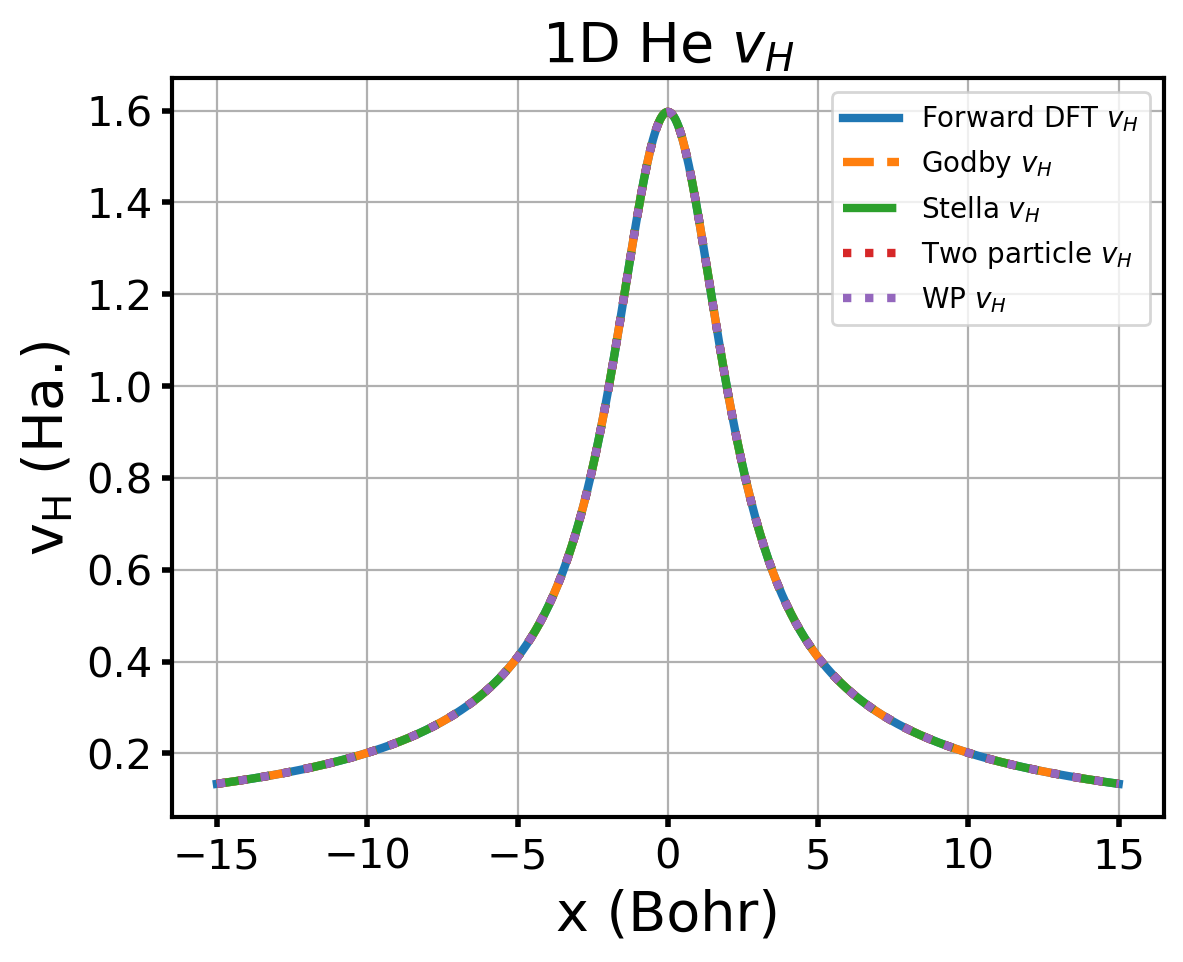

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid,  target_vh, label=r"Forward DFT $v_{H}$", linewidth=3)
ax.plot(x_grid,  godby_vh, label=r"Godby $v_{H}$", linewidth=3, ls='--')
ax.plot(x_grid,  stella_vh, label=r"Stella $v_{H}$", linewidth=3, ls='-.')
ax.plot(x_grid,  two_particle_vh, label=r"Two particle $v_{H}$", linewidth=3, ls=':')
ax.plot(x_grid,  wp_vh, label=r"WP $v_{H}$", linewidth=3, ls=':')
#---------------> Formatting
ax.set_title(r"1D He $v_{H}$", fontsize = 20)
ax.set_ylabel(r"$\rm v_H$ (Ha.)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
ax.legend()
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(width=2)
plt.show()

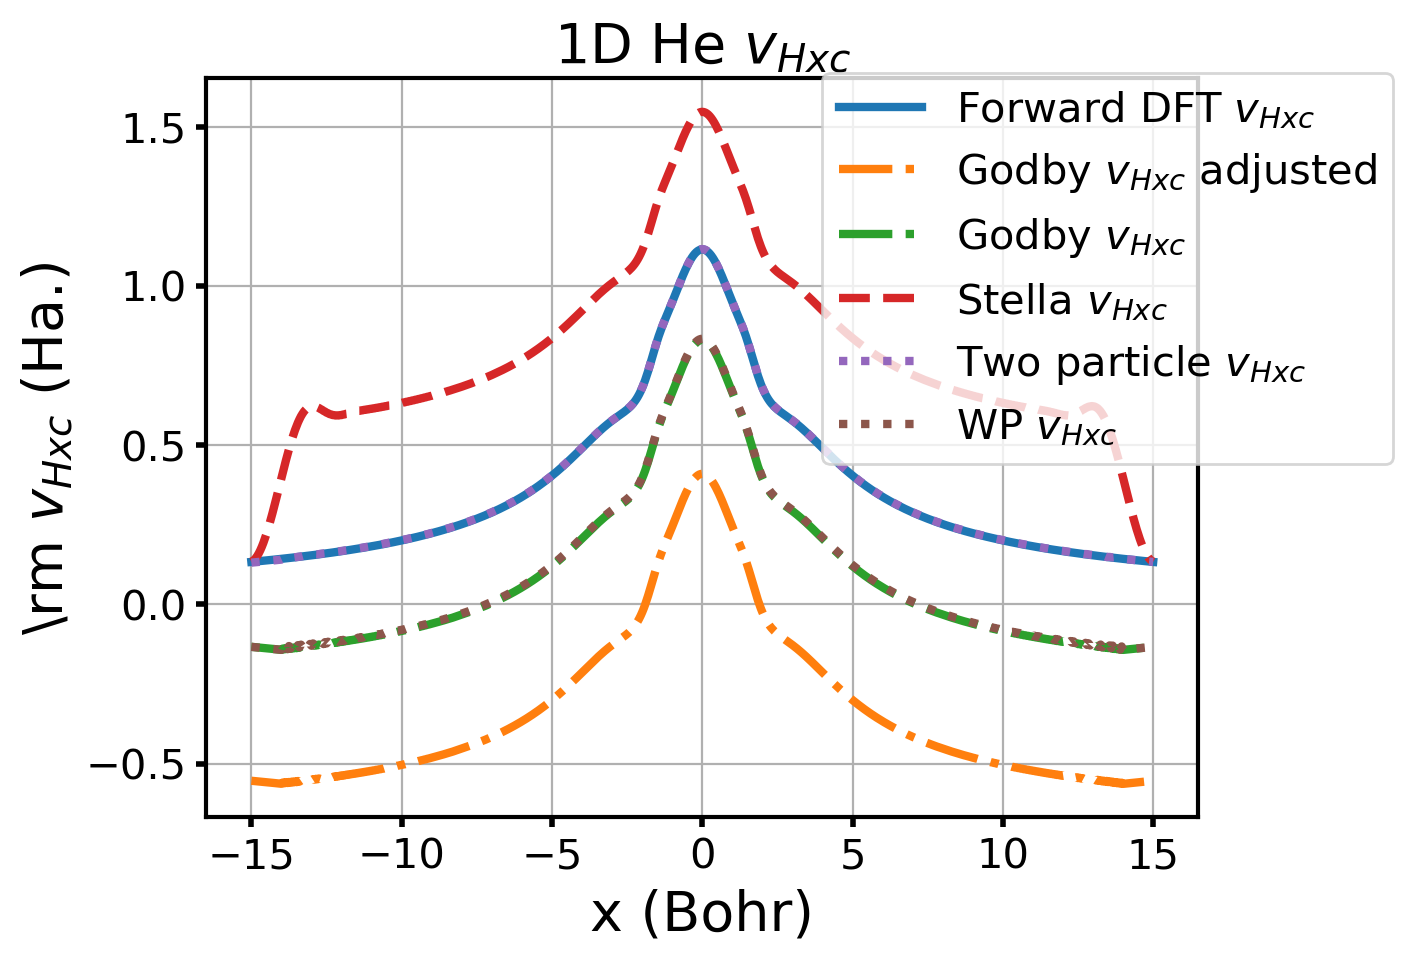

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid,  target_vh + target_vxc, label=r"Forward DFT $v_{Hxc}$", linewidth=3)
ax.plot(x_grid,  godby_vh + godby_vxc + godbyAverageDifference, label=r"Godby $v_{Hxc}$ adjusted", linewidth=3, ls='-.')
ax.plot(x_grid,  godby_vh + godby_vxc, label=r"Godby $v_{Hxc}$", linewidth=3, ls='-.')
ax.plot(x_grid,  stella_vh + stella_vxc, label=r"Stella $v_{Hxc}$", linewidth=3, ls='--')
ax.plot(x_grid,  two_particle_vh + two_particle_vxc, label=r"Two particle $v_{Hxc}$", linewidth=3, ls=':')
ax.plot(x_grid,  wp_vh + wp_vxc, label=r"WP $v_{Hxc}$", linewidth=3, ls=':')
#---------------> Formatting
ax.set_title(r"1D He $v_{Hxc}$", fontsize = 20)
ax.set_ylabel(r"\rm $v_{Hxc}$ (Ha.)", fontsize = 20)
ax.set_xlabel(r"x (Bohr)", fontsize = 20)
ax.grid(True)
ax.legend( bbox_to_anchor=(0.6, .45), fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(width=2)
plt.show()

### Plot of $\frac{1}{r}$

/var/folders/ds/n2806b452yv63hlbjdqg20400000gp/T/ipykernel_21365/807682900.py:5: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x_grid,  -1/abs(x_grid) - (-1/15), label=r'$\frac{-1}{x}$', ls='--', linewidth=3)


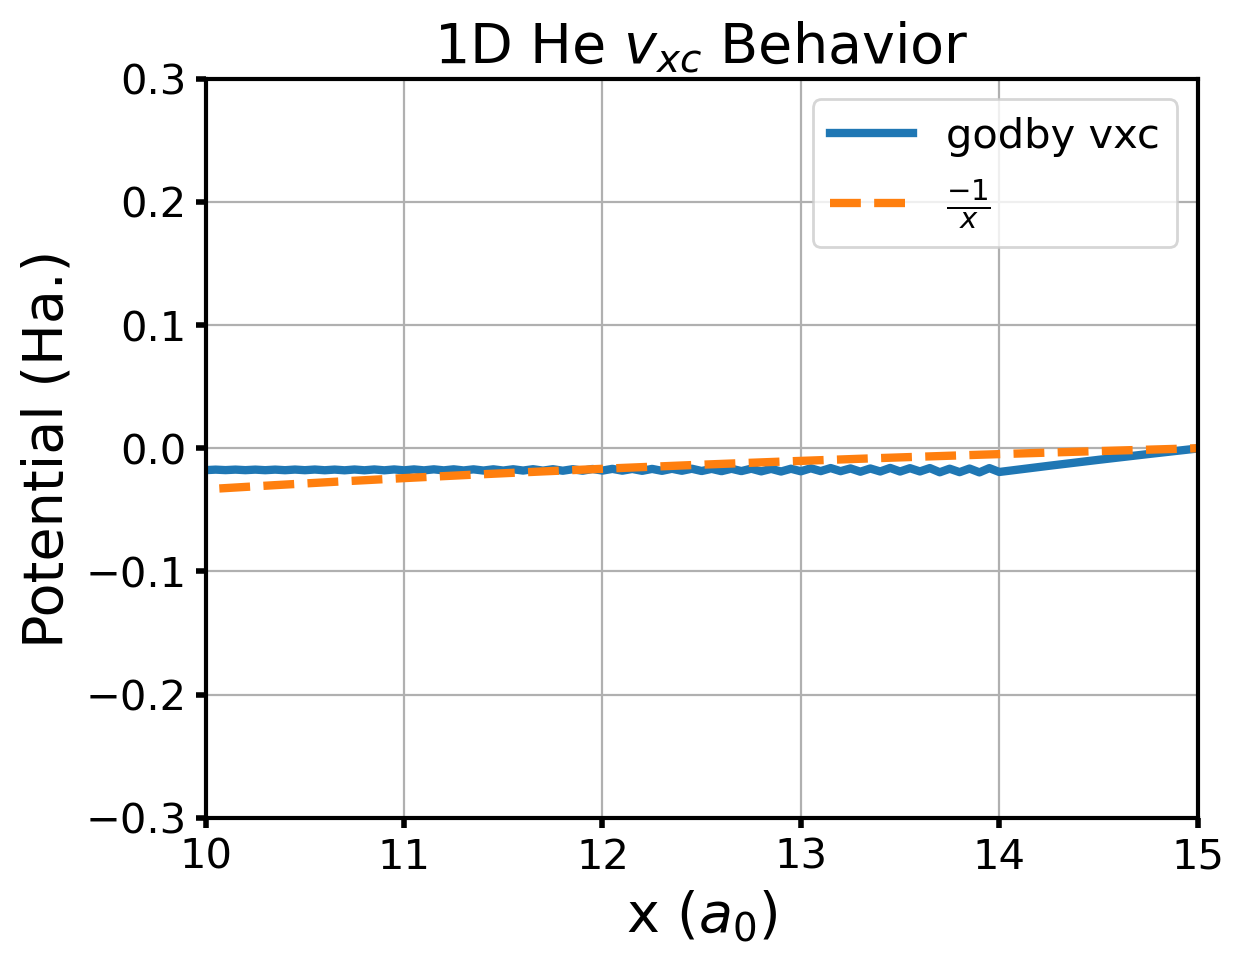

In [ ]:
#---------------> Plot
fig, ax = plt.subplots(1, 1, dpi=200)
#---------------> Data
ax.plot(x_grid, godby_vxc -godby_vxc[0], label=r'godby vxc', linewidth=3)
ax.plot(x_grid,  -1/abs(x_grid) - (-1/15), label=r'$\frac{-1}{x}$', ls='--', linewidth=3)
#---------------> Formatting
ax.set_title(r"1D He $v_{xc}$ Behavior", fontsize = 20)
ax.set_ylabel(r"Potential (Ha.)", fontsize = 20)
ax.set_xlabel(r"x ($a_0$)", fontsize = 20)
ax.set_ylim(-0.3, 0.3)
ax.set_xlim(10, 15)
ax.grid(True)
ax.legend(loc="best", fontsize=15)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
#-------> Borders ## Have to run cell twice for this to work no idea why -- AO
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.0
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()